<a href="https://colab.research.google.com/github/Gerilda/Arrhythmia/blob/main/Arrhythmia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

###Аритмия

Цель состоит в том, чтобы различить наличие и отсутствие сердечной аритмии и классифицировать ее в одну из 16 групп.
Класс 01 относится к "нормальным" ЭКГ, классы 02-15 относятся к различным классам аритмий, а класс 16 относится к остальным неклассифицированным.
Эта база данных содержит 279 атрибутов, 206 из которых количественные (числовые), а остальные - номинальные.

#1. Загружаем данные

In [ ]:
url = "https://raw.githubusercontent.com/Gerilda/Arrhythmia/main/arrhythmia.csv"

In [ ]:
data_raw = pd.read_csv(url, delimiter=';', na_values=['?'])

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(452, 280)

Отсюда видно, что в датасете есть 280 признаков.
Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы.

In [ ]:
data_raw.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


Отображаем последние строки таблицы (по умолчанию 5):

In [ ]:
data_raw.tail()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
447,53,1,160,70,80,199,382,154,117,-37,4.0,40.0,-27.0,NaN,63.0,0,52,24,0,0,28,0,0,0,0,0,0,0,44,40,0,0,32,0,0,0,0,0,0,0,...,0.0,1.3,-9.2,0.0,0.0,-0.1,2.2,-22.1,3.8,0.2,0.0,2.9,-10.3,0.0,0.0,0.8,1.4,-20.1,-9.5,0.1,0.0,4.1,-8.3,0.0,0,0.8,1.0,-8.4,-0.6,0.0,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,NaN,73.0,0,44,36,0,0,24,0,0,0,0,0,0,0,56,0,0,0,32,0,0,0,0,0,0,0,...,0.0,12.2,-5.4,0.0,0.0,-0.3,10.8,27.7,137.8,0.1,0.0,22.5,-3.5,0.9,0.0,0.7,5.9,69.2,129.3,-0.7,0.0,21.2,-2.8,0.0,0,0.4,3.7,50.7,82.5,-0.5,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,84.0,16,40,40,0,0,40,0,0,0,0,0,0,0,40,56,0,0,32,0,0,0,0,0,0,0,...,0.0,18.3,-34.1,0.0,0.0,1.4,-8.2,-75.7,-146.2,-0.4,0.0,20.6,-36.7,0.0,0.0,1.0,-8.2,-71.2,-161.4,0.2,0.0,22.0,-30.8,0.0,0,1.9,-2.5,-39.6,-63.6,1.2,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,29.0,-22.0,43.0,103.0,80.0,0,56,0,0,0,32,0,0,0,0,0,0,16,64,0,0,0,40,0,0,0,0,0,0,16,...,0.0,8.8,-7.7,0.0,0.0,0.9,7.3,3.9,94.4,0.4,0.0,11.9,-6.7,0.0,0.0,0.6,3.8,17.5,56.2,0.1,0.0,15.3,-3.5,0.0,0,0.4,3.2,29.7,61.0,0.2,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,79.0,52.0,47.0,NaN,75.0,0,44,28,0,0,24,0,0,0,0,0,0,0,56,0,0,0,36,0,0,0,0,0,0,0,...,0.0,20.7,-6.3,0.0,0.0,0.4,2.9,38.3,60.9,-1.1,0.0,23.6,-6.3,0.0,0.0,0.5,2.4,44.0,60.8,-0.4,0.0,12.5,-2.9,0.0,0,0.6,1.7,26.7,38.9,-0.3,0.0,10.4,-1.8,0.0,0,0.5,1.6,21.3,32.8,1


###Attribute Information:

1 Age: Age in years , linear
2 Sex: Sex (0 = male; 1 = female) , nominal
3 Height: Height in centimeters , linear
4 Weight: Weight in kilograms , linear
5 QRS duration: Average of QRS duration in msec., linear
6 P-R interval: Average duration between onset of P and Q waves in msec., linear
7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
8 T interval: Average duration of T wave in msec., linear
9 P interval: Average duration of P wave in msec., linear
Vector angles in degrees on front plane of:, linear
10 QRS
11 T
12 P
13 QRST
14 J

15 Heart rate: Number of heart beats per minute ,linear

Of channel DI:
Average width, in msec., of: linear
16 Q wave
17 R wave
18 S wave
19 R' wave, small peak just after R
20 S' wave

21 Number of intrinsic deflections, linear

22 Existence of ragged R wave, nominal
23 Existence of diphasic derivation of R wave, nominal
24 Existence of ragged P wave, nominal
25 Existence of diphasic derivation of P wave, nominal
26 Existence of ragged T wave, nominal
27 Existence of diphasic derivation of T wave, nominal

Of channel DII:
28 .. 39 (similar to 16 .. 27 of channel DI)
Of channels DIII:
40 .. 51
Of channel AVR:
52 .. 63
Of channel AVL:
64 .. 75
Of channel AVF:
76 .. 87
Of channel V1:
88 .. 99
Of channel V2:
100 .. 111
Of channel V3:
112 .. 123
Of channel V4:
124 .. 135
Of channel V5:
136 .. 147
Of channel V6:
148 .. 159

Of channel DI:
Amplitude , * 0.1 milivolt, of
160 JJ wave, linear
161 Q wave, linear
162 R wave, linear
163 S wave, linear
164 R' wave, linear
165 S' wave, linear
166 P wave, linear
167 T wave, linear

168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

Of channel DII:
170 .. 179
Of channel DIII:
180 .. 189
Of channel AVR:
190 .. 199
Of channel AVL:
200 .. 209
Of channel AVF:
210 .. 219
Of channel V1:
220 .. 229
Of channel V2:
230 .. 239
Of channel V3:
240 .. 249
Of channel V4:
250 .. 259
Of channel V5:
260 .. 269
Of channel V6:
270 .. 279

Требуется предсказать категориальный признак `diagnosis`, представленный в числовом виде с номером типа по остальным признакам. Это *задача классификации*.

In [ ]:
data_raw.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [ ]:
data_raw.index

RangeIndex(start=0, stop=452, step=1)

##Доступ к отдельным элементам и выделение подтаблиц (slice)

###Доступ по имени

Данные в 3 записи, в 'qrs_duration' столбце

In [ ]:
data_raw.at[3, 'qrs_duration']

100

In [ ]:

data_raw.loc[3, 'qrs_duration']

100

###Доступ по номеру:

Данные в 3 записи, в 4-ом столбце (счет начиная с 0-ого столбца)



In [ ]:
data_raw.iat[3, 4]

100

In [ ]:
data_raw.iloc[3, 4]

100

##Подтаблицы

In [ ]:
data_raw.loc[[2,3,5], ['height', 'weight', 'heart_rate']]

,height,weight,heart_rate
2,172,95,75.0
3,175,94,71.0
5,169,51,84.0


In [ ]:
data_raw.iloc[[2,3,5], [2,3,14]]

,height,weight,heart_rate
2,172,95,75.0
3,175,94,71.0
5,169,51,84.0


In [ ]:
data_raw.loc[[2,3,5]]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
5,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,NaN,84.0,0,36,48,0,0,20,0,0,0,0,0,0,20,44,36,0,0,44,0,0,0,0,0,0,24,...,-0.8,19.8,-48.4,0.0,0.0,1.6,8.7,-114.5,-72.8,2.0,0.0,31.0,-25.7,0.0,0.0,0.8,5.9,29.2,85.8,0.6,0.0,19.5,-11.4,0.0,0,0.8,3.3,20.1,49.1,0.0,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14


In [ ]:
data_raw['sex']

0      0
1      1
2      0
3      0
4      0
      ..
447    1
448    0
449    0
450    1
451    1
Name: sex, Length: 452, dtype: int64

#2. Боремся с выбросами (outliers)

Сnроим диаграмму рассеивания для двух признаков: Age и Diagnosis.

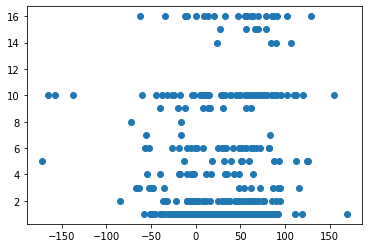

In [ ]:
plt.scatter(data_raw['qrs'], data_raw['diagnosis'])

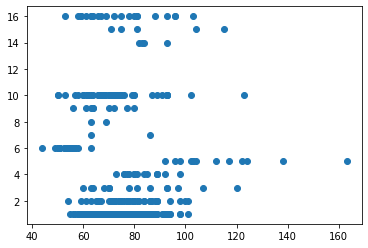

In [ ]:
plt.scatter(x='heart_rate', y='diagnosis', data=data_raw)    # другой способ

Какие-то точки соответствуют чрезмерно большими значениями qrs. Например, менее -100 или более 150. Это выбросы (outliers) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем, например, квантиль для признака qrs:

In [ ]:
data_raw['qrs'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005   -152.645
0.010    -78.880
0.050    -46.900
0.100    -23.800
0.500     40.000
0.900     82.000
0.950     91.000
0.990    122.450
0.995    128.235
Name: qrs, dtype: float64

Мы видим, например, что большая часть всех значений признака 'qrs' находится в диапазоне от $-152.645$ до $128.235$ тыс. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

Удалим все строки таблицы, в которых 'qrs' выходят за пределы квантилей $0.005$, $0.995$.

In [ ]:
rows_to_drop = data_raw[
    (data_raw['qrs'] < data_raw['qrs'].quantile(0.005)) | (data_raw['qrs'] > data_raw['qrs'].quantile(0.995)) ].index
data = data_raw.drop(rows_to_drop)
data.shape

(446, 280)

In [ ]:
rows_to_drop

Int64Index([102, 297, 313, 380, 403, 427], dtype='int64')

#3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод describe:

In [ ]:
data_raw.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,444.000000,430.000000,451.000000,76.000000,451.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,-13.592105,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.858255,29.346409,36.020725,127.220248,13.870684,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-124.500000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9

Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

По умолчанию этот метод дает информацию только о количественных признаках.
ЧТобы получить информацию о категориальных:

In [ ]:
#data.describe(include=['category'])

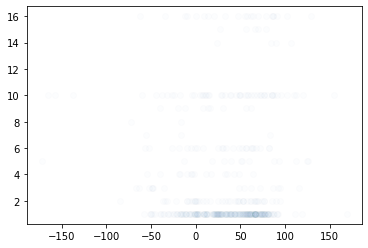

In [ ]:
plt.scatter(data_raw['qrs'], data_raw['diagnosis'], alpha=0.01)

Text(0, 0.5, 'diagnosis')

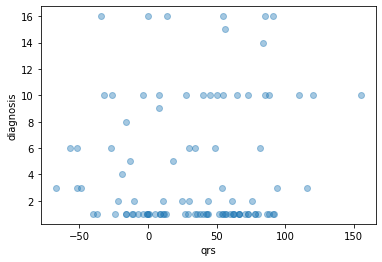

In [ ]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=100, replace=False)
plt.scatter(data_raw.iloc[random_subset]['qrs'], data_raw.iloc[random_subset]['diagnosis'], alpha=0.4)
plt.xlabel('qrs')
plt.ylabel('diagnosis')

Text(0, 0.5, 'diagnosis')

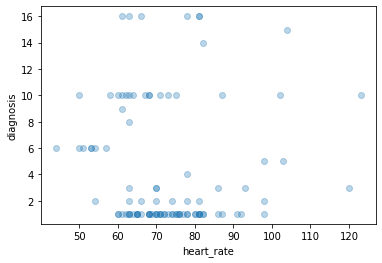

In [ ]:
plt.scatter(data_raw.iloc[random_subset]['heart_rate'], data_raw.iloc[random_subset]['diagnosis'], alpha = .3)
plt.xlabel('heart_rate')
plt.ylabel('diagnosis')

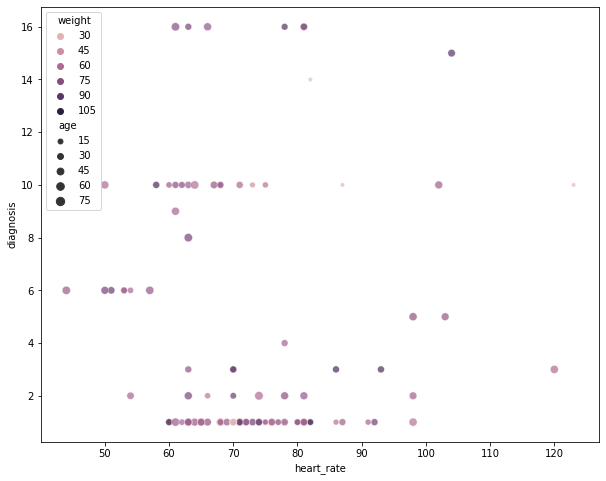

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='heart_rate', y='diagnosis', size='age', hue='weight', data=data_raw.iloc[random_subset], alpha=0.7)

$Не выполнялось - слишком много данных:$

In [ ]:
#sns.pairplot(data.iloc[random_subset], hue='sex', diag_kind='hist')
#plt.legend()

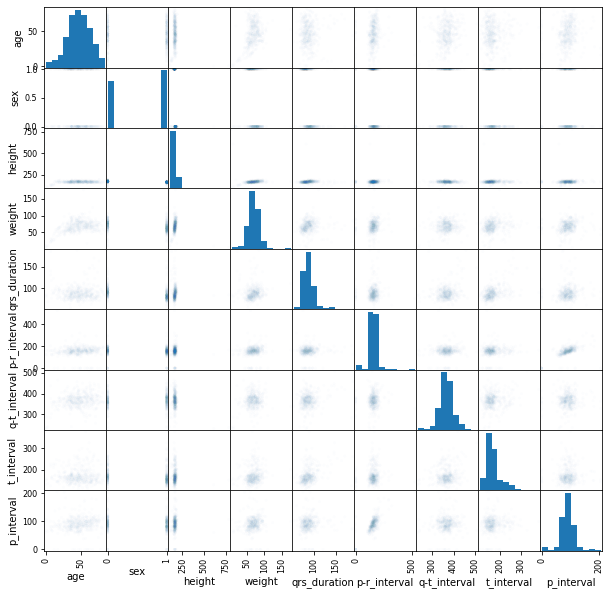

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw.loc[:,:'p_interval'], alpha = .01, figsize = (10, 10))
pass

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


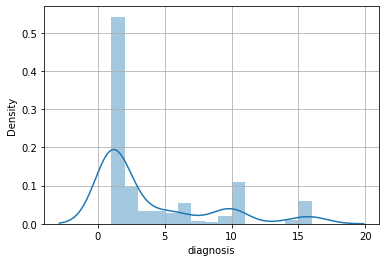

In [ ]:
sns.distplot(data_raw['diagnosis'], bins=15)
plt.grid()

Представим вместе диаграмму рассеивания для пары признаков и соответствующие гистограммы:

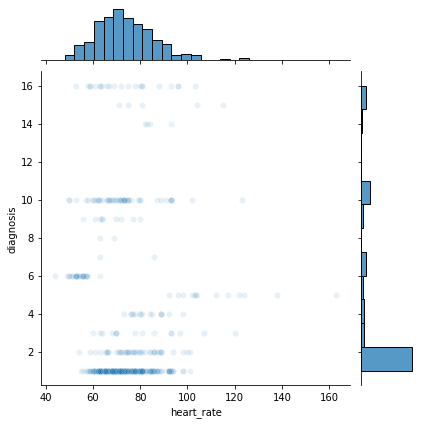

In [ ]:
sns.jointplot(x='heart_rate', y='diagnosis', alpha=.1, data=data_raw)

Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

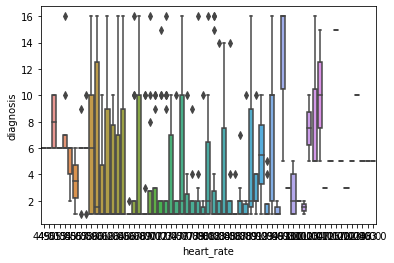

In [ ]:
sns.boxplot(x="heart_rate", y="diagnosis", data=data_raw)

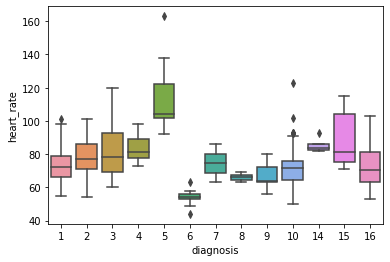

In [ ]:
sns.boxplot(x="diagnosis", y="heart_rate", data=data_raw)

Скрипичные графики (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

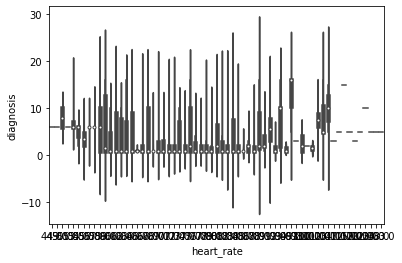

In [ ]:
sns.violinplot(x="heart_rate", y="diagnosis", data=data_raw)

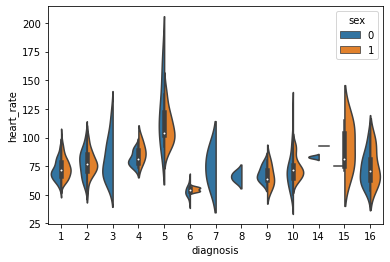

In [ ]:
sns.violinplot(x="diagnosis", y="heart_rate", hue='sex', split=True, data=data_raw)

Матрица корреляции для количественных признаков:

In [ ]:
corr_mat = data.corr()
corr_mat

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
age,1.000000,-0.039054,-0.123776,0.359873,0.042456,0.048586,0.187126,0.015096,0.108775,-0.280489,0.012940,-0.019662,-0.265992,-0.067990,-0.175443,0.013607,0.187328,-0.123329,0.028589,NaN,0.143633,0.045043,0.132686,0.007960,0.090668,0.057566,0.031744,-0.026499,0.206576,-0.127261,-0.011340,0.036148,0.024925,0.041972,0.091509,0.018741,0.003776,0.038946,0.065491,0.160069,...,-0.038149,-0.019588,0.087657,-0.082547,0.110421,-0.128084,-0.114413,-0.022901,-0.120815,-0.116334,-0.003212,-0.183619,0.009415,-0.197626,-0.014066,-0.051067,-0.159141,-0.176761,-0.239199,-0.207410,0.060240,-0.189462,0.007941,0.082176,NaN,-0.058039,-0.246986,-0.095853,-0.240957,-0.202957,0.155708,-0.168337,0.055419,0.091729,NaN,-0.051143,-0.260104,-0.002317,-0.212117,-0.103444
sex,-0.039054,1.000000,-0.121627,-0.238783,-0.373753,-0.049221,0.081647,-0.177323,-0.085293,0.056681,-0.142980,0.003429,0.019071,-0.157987,0.056347,-0.154811,0.022193,-0.144791,-0.020855,NaN,-0.087228,0.042743,0.010369,-0.075271,-0.006959,-0.074435,-0.105505,-0.149809,0.014933,-0.115373,-0.087133,-0.042471,-0.114306,-0.047982,-0.111767,-0.052574,-0.006959,-0.006959,-0.031230,-0.024474,...,0.203765,-0.164709,0.228101,-0.068355,0.057053,0.124388,-0.174194,0.179946,-0.014619,-0.138217,0.161120,-0.229727,0.284852,-0.040284,0.030709,-0.035935,-0.129095,0.089025,-0.039089,-0.055256,0.196658,-0.207203,0.230128,0.048880,NaN,0.005820,-0.036155,0.023614,-0.028301,-0.020473,0.243263,-0.047742,0.107161,0.027479,NaN,0.018361,0.057941,0.033487,0.043522,-0.170271
height,-0.123776,-0.121627,1.000000,-0.089473,0.016981,0.016739,-0.246036,-0.039371,0.029566,0.061945,-0.000622,-0.097887,0.035650,0.099503,0.305270,0.002625,-0.101643,0.052118,0.006212,NaN,-0.089515,0.004589,-0.014821,0.013735,-0.010602,0.002898,0.006021,-0.011632,-0.069675,-0.002363,0.236255,0.155578,-0.057602,0.004476,0.002119,0.003318,0.005597,0.008297,0.003517,-0.021073,...,-0.016592,0.120997,0.011336,-0.045045,0.058119,0.096103,-0.002243,0.054863,0.027955,0.101160,-0.024063,0.121453,-0.067404,-0.028484,-0.000895,0.045487,0.049397,0.005789,0.015869,0.137463,-0.039328,0.044606,-0.112806,-0.009615,NaN,0.031587,0.011499,-0.047319,-0.048656,0.152922,-0.020978,-0.081879,-0.114370,-0.002986,NaN,0.062781,-0.001877,-0.107743,-0.100416,0.010461
weight,0.359873,-0.238783,-0.089473,1.000000,0.170669,0.131182,0.105052,0.147264,0.128238,-0.203082,-0.044919,0.004332,-0.191661,0.132220,-0.149783,0.070693,0.094835,-0.008127,0.121041,NaN,0.129500,0.120475,-0.003868,0.000035,-0.011867,0.008631,0.070344,0.099577,0.121060,-0.036068,-0.080032,-0.061653,0.152043,0.067945,0.082125,0.311589,0.022980,0.109074,0.152326,0.196860,...,-0.083457,-0.042268,0.091237,-0.072013,0.109676,-0.137431,-0.002357,0.007614,0.006698,-0.047343,-0.084523,-0.118952,0.038076,-0.110746,0.024461,-0.078076,-0.053539,-0.079317,-0.088530,-0.076250,-0.010827,-0.092263,-0.017534,-0.022313,NaN,-0.076403,-0.115551,-0.049982,-0.109800,-0.093601,0.039447,-0.042309,0.010815,0.047259,NaN,-0.062744,-0.129738,0.030599,-0.067985,-0.091719
qrs_duration,0.042456,-0.373753,0.016981,0.170669,1.000000,0.005458,0.266213,0.430497,0.059872,-0.076581,0.036777,-0.032943,-0.129632,0.122151,-0.068639,0.117118,0.385719,0.143590,0.057674,NaN,0.483175,0.028017,0.213296,0.003966,0.025730,0.179044,0.263657,0.101278,0.315344,0.260516,0.002469,0.108489,0.430956,0.082215,0.100563,0.073958,0.111679,0.053605,0.134571,-0.062701,...,-0.049517,0.111622,-0.439567,0.138933,-0.111023,-0.161718,0.240226,-0.455710,-0.061598,0.301083,-0.057866,0.056962,-0.394149,-0.043746,0.004003,-0.037050,0.107051,-0.343755,-0.106675,-0.108298,-0.145301,0.107797,-0.239094,0.231874,NaN,-0.046274,-0.079777,-0.011845,

Визуальный образ этой матрицы (чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции):

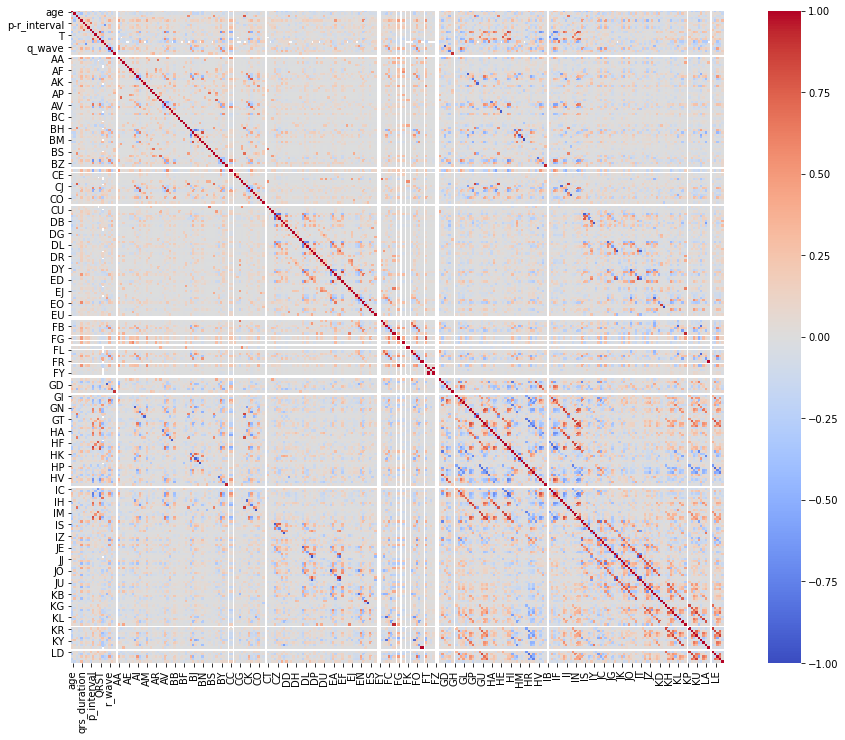

In [ ]:
plt.figure(figsize = (16, 12))
sns.heatmap(corr_mat, square=True, cmap='coolwarm')


Коэффициенты корреляции, большие заданного значения:

In [ ]:
corr_mat > 0.5

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sex,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
height,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
weight,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
qrs_duration,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LD,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
LE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

FU      FY    1.000000
FR      LB    0.997769
ED      JS    0.968383
JI      JT    0.960289
CA      IA    0.946673
                ...   
r_wave  AA    0.501903
DL      JL    0.501597
BZ      HH    0.501536
GU      KH    0.501411
JY      KD    0.500692
Length: 439, dtype: float64

#Заполнение пропущенных значений

In [ ]:
data_raw.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,444.000000,430.000000,451.000000,76.000000,451.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.150901,48.913953,36.716186,-13.592105,74.463415,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.858255,29.346409,36.020725,127.220248,13.870684,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-124.500000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [ ]:
data_raw.isna().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [ ]:
data_raw['J'].isna().sum()

376


Можно было бы удалить строки с пропущенными значениями, это разумно в случае, когда таких строк немного. В данном случае такие стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [ ]:
data_raw.fillna(data.median(axis = 0), axis=0 , inplace=True)
#data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
data_raw.isna().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [ ]:
#data_raw['J'].fillna(data.median(axis = 0), axis=0 , inplace=True)
data_raw['J'].isna().sum()

0


Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [ ]:
data_raw['J'].fillna(data['J'].mode().iloc[0], inplace=True)
data_raw['J'].isna().sum()

0

In [ ]:
data_raw.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,36.236726,49.234513,36.723451,-72.161504,74.457965,5.628319,51.628319,20.920354,0.141593,0.0,30.035398,0.002212,0.011062,0.011062,0.004425,0.004425,0.008850,5.619469,54.336283,20.59292,0.433628,0.150442,31.637168,0.017699,0.028761,0.002212,0.004425,0.004425,0.015487,16.026549,...,-0.653540,8.039602,-10.150664,0.032965,-0.013496,0.226770,3.894690,-8.269027,32.422788,0.001106,-0.297566,11.839381,-7.034513,0.025664,-0.002876,0.547788,2.535841,10.081195,33.328540,-0.285398,-0.277212,11.369912,-3.607522,0.016814,0.0,0.546681,1.722124,17.840044,32.871460,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,57.346376,28.656837,35.981100,58.193027,13.855782,10.650001,18.249901,20.541728,1.569483,0.0,10.046393,0.047036,0.104708,0.104708,0.066445,0.066445,0.093759,11.220680,17.248213,21.06105,3.093161,2.692591,9.624951,0.132002,0.167319,0.047036,0.066445,0.066445,0.123615,21.906457,...,3.414085,5.279719,7.066568,0.390403,0.264398,0.548988,2.990809,32.157008,37.362289,1.015566,1.758544,5.917391,5.061472,0.166763,0.046287,0.426941,2.429776,25.074695,34.361665,0.675060,0.992472,4.793656,2.850633,0.275907,0.0,0.370548,1.708190,16.445472,24.421643,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,-177.000000,-170.000000,-135.000000,-179.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-32.900000,0.000000,-48.400000,0.000000,-5.600000,-3.100000,-11.800000,-242.400000,-146.200000,-3.200000,-20.400000,0.000000,-42.900000,0.000000,-0.900000,-2.600000,-8.200000,-124.800000,-161.400000,-4.800000,-14.200000,0.000000,-30.800000,0.000000,0.0,-0.900000,-5.000000,-56.800000,-63.600000,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,14.000000,41.000000,12.000000,-84.000000,65.000000,0.000000,40.000000,0.000000,0.000000,0.0,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.00000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,-13.000000,0.000000,0.000000,0.000000,2.000000,-19.525000,9.850000,-0.500000,0.000000,7.875000,-9.

#6. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [ ]:
data_stand = (data - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,...,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,438.000000,424.000000,445.000000,73.000000,445.000000,446.000000,446.000000,446.000000,446.000000,0.0,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,...,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,0.0,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,0.0,446.000000,446.000000,446.000000,446.000000,446.000000
mean,0.007057,0.001375,0.005437,0.013517,-0.029840,-0.005004,0.004516,-0.006249,-0.004425,0.012094,-0.003969,-0.025384,-0.013486,0.950024,-0.018131,-0.011417,0.018400,-0.021664,0.001214,NaN,0.016116,0.000633,0.001421,0.001421,0.000896,0.000896,0.001270,-0.002055,0.013262,-0.023042,0.001886,0.000752,0.006947,0.001804,0.002312,0.000633,0.000896,0.000896,0.001685,-0.002850,...,-0.001984,-0.007119,0.006662,-0.001736,-0.000687,0.002290,0.018268,-0.001856,0.011806,-0.005946,-0.002276,0.006872,0.014837,0.002070,-0.000836,-0.002696,0.007027,0.019072,0.018647,-0.015652,-0.003758,0.011188,0.020179,0.000820,NaN,0.000485,-0.001007,0.024519,0.016795,-0.017886,0.005009,0.015229,0.022793,0.001069,NaN,0.001864,-0.004349,0.024915,0.015899,-0.014610
std,0.986157,0.999873,1.004300,0.987852,0.941294,1.004758,0.994724,0.989112,0.999811,0.915431,1.012064,1.007763,0.973100,2.202192,0.986064,0.959913,0.989842,0.978678,1.006664,NaN,0.991647,1.006704,1.006643,1.006643,1.006689,1.006689,1.006659,1.000751,0.998933,0.985340,1.006586,1.006698,0.997672,1.006597,1.006518,1.006704,1.006689,1.006689,1.006612,1.003252,...,1.006507,0.994405,0.995375,1.005079,1.006701,0.991772,0.989646,0.965590,0.981819,1.002772,1.006525,1.003000,0.981140,1.006558,1.006693,0.992177,1.004598,0.984221,0.987408,0.979229,1.006189,0.999196,0.976284,1.006694,NaN,0.988224,1.002597,0.981540,0.992435,0.966402,0.995609,0.994154,0.950042,1.006676,NaN,0.986109,1.001182,0.975230,0.991688,0.991046
min,-2.822146,-1.106294,-1.646153,-3.747278,-2.207725,-3.459963,-4.049910,-1.738529,-3.484945,-3.756804,-3.718399,-7.650339,-4.772602,-1.835933,-2.198213,-0.528481,-2.828964,-1.018432,-0.090216,NaN,-2.989670,-0.047036,-0.105645,-0.105645,-0.066593,-0.066593,-0.094387,-0.500814,-3.150256,-0.977773,-0.140189,-0.055873,-3.286995,-0.134083,-0.171893,-0.047036,-0.066593,-0.066593,-0.125282,-0.731590,...,-9.445126,-1.522733,-5.412717,-0.084437,-21.129170,-6.059819,-5.247640,-7.280869,-4.780831,-3.152043,-11.431293,-2.000777,-7.085980,-0.153893,-19.381771,-7.372881,-4.418448,-5.379176,-5.667029,-6.687701,-14.028394,-2.371866,-9.539102,-0.060941,NaN,-3.904164,-3.935232,-4.538638,-3.950245,-8.777335,-6.961535,-2.605346,-13.554882,-0.079458,NaN,-3.495585,-5.064574,-4.704271,-3.680842,-0.653612
25%,-0.635907,-1.106294,-0.166478,-0.552737,-0.580586,-0.310035,-0.515433,-0.615976,-0.426088,-0.653226,-0.387762,-0.322245,-0.687123,-0.925171,-0.682601,-0.528481,-0.637172,-1.018432,-0.090216,NaN,-0.600753,-0.047036,-0.105645,-0.105645,-0.066593,-0.066593,-0.094387,-0.500814,-0.599267,-0.977773,-0.140189,-0.055873,-0.793476,-0.134083,-0.171893,-0.047036,-0.066593,-0.066593,-0.125282,-0.731590,...,0.191425,-0.727236,-0.381987,-0.084437,0.051043,-0.413069,-0.600068,-0.345367,-0.565350,-0.493426,0.169212,-0.631931,-0.388323,-0.153893,0.062

#7. Отбор признаков

In [ ]:
data_raw.columns

Index(['age', 'sex', 'height', 'weight', 'qrs_duration', 'p-r_interval',
       'q-t_interval', 't_interval', 'p_interval', 'qrs',
       ...
       'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG', 'diagnosis'],
      dtype='object', length=280)

In [ ]:
#X = data_stand.drop(['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AR', 'AS', 'AT', 'AU', 'AV', 'AY', 'AZ', 'AB', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BR', 'BS', 'BT', 'BU', 'BV', 'BY', 'BZ', 'CA', 'CB', 'CC', 'CD', 'CE', 'Cf', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CR', 'CS', 'CT', 'CU', 'CV', 'CY', 'CZ', 'DA', 'DB', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DR', 'DS', 'DT', 'DU', 'DV', 'DY', 'DZ', 'EA', 'EB', 'EC', 'ED', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EM', 'EN', 'EO', 'EP', 'ER', 'ES', 'ET', 'EU', 'EV', 'EY', 'EZ', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FR', 'FS', 'FT', 'FU', 'FV', 'FY', 'FZ', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'GK', 'GL', 'GM', 'GN', 'GO', 'GP', 'GR', 'GS', 'GT', 'GU', 'GV', 'GY', 'GZ', 'HA', 'HB', 'HC', 'HD', 'HE', 'HF', 'HG', 'HH', 'HI', 'HJ', 'HK', 'HL', 'HM', 'HN', 'HO', 'HP', 'HR', 'HS', 'HT', 'HU', 'HV', 'HY', 'HZ', 'IA', 'IB', 'IC', 'ID', 'IE', 'IF', 'IG', 'IH', 'II', 'IJ', 'IK', 'IL', 'IM', 'IN', 'IO', 'IP', 'IR', 'IS', 'IT', 'IU', 'IV', 'IY', 'IZ', 'JA', 'JB', 'JC', 'JD', 'JE', 'JF', 'JG', 'JH', 'JI', 'JJ', 'JK', 'JL', 'JM', 'JN', 'JO', 'JP', 'JR', 'JS', 'JT', 'JU', 'JV', 'JY', 'JZ', 'KA', 'KB', 'KC', 'KD', 'KE', 'KF', 'KG', 'KH', 'KI', 'KJ', 'KK', 'KL', 'KM', 'KN', 'KO', 'KP', 'KR', 'KS', 'KT', 'KU', 'KV', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LD', 'LE', 'LF', 'LG'], axis=1)
#y = data_raw['diagnosis']

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#N_train, _ = X_train.shape
#N_test,  _ = X_test.shape 

#N_train, N_test

In [ ]:
#from sklearn.linear_model import LinearRegression

#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)

По классификациии: не сбалансированная. нужно рассматривать разные ошибки. смотреть на баланс ошибки
Делать то, что делается в книжке. Разбить признаки на подгруппы, для каждыйх подгрупп выполнять визуализацию. Nan исправить, НЮ скинул вариант

##Классификация

Заполняем модель: X - данные без колонки диагноза, y - диагноз.

In [ ]:
X = data_raw.drop('diagnosis', axis = 1)
y = data_raw['diagnosis']
feature_names = X.columns

In [ ]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

In [ ]:
X = X.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

316 136


###Алгоритм k ближайших соседей

neighbours = 2 err_train = 0.27531645569620256 err_test = 0.4485294117647059
[[176   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  17   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   6   0   0   0   0   0   0   0   0   0   0]
 [  6   1   0   5   0   0   0   0   0   0   0   0   0]
 [  4   0   0   1   4   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   4   0   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   7   0   0   0   0]
 [ 19   1   0   0   0   3   0   0   0   8   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   1   0   2   0]
 [  8   1   1   1   0   1   0   0   0   2   0   1   0]]


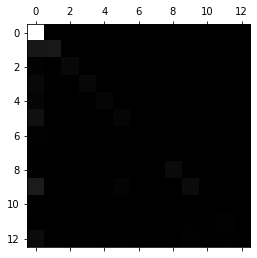

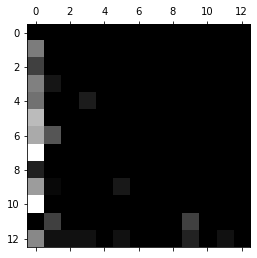

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.7246835443037974
Precision Score Train:  0.7246835443037974
Recall Score Train:  0.7246835443037974
neighbours = 3 err_train = 0.2848101265822785 err_test = 0.41911764705882354
[[173   1   0   1   0   1   0   0   0   0   0   0   0]
 [ 18  15   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   6   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   6   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   2   0   0   0   0   1   0   0   0]
 [ 11   0   0   0   0   4   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   7   0   0   0   0]
 [ 19   1   0   0   0   0   0   0   0  11   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   2   0]
 [ 11   1   1   0   1   1   0   0   0   0   0   0   0]]


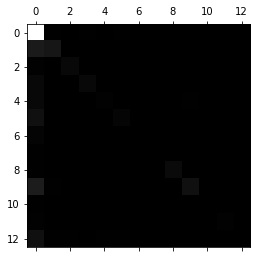

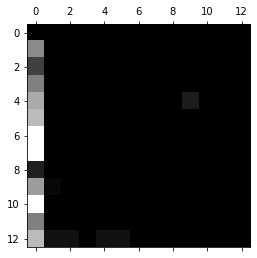

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.7151898734177216
Precision Score Train:  0.7151898734177216
Recall Score Train:  0.7151898734177216
neighbours = 5 err_train = 0.310126582278481 err_test = 0.4338235294117647
[[173   2   0   0   0   0   0   0   0   1   0   0   0]
 [ 18  15   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   6   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   3   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   2   0   0   0   0   1   0   0   0]
 [ 13   0   0   0   0   2   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   7   0   0   0   0]
 [ 22   0   0   0   0   1   0   0   0   8   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0   0   0   0   0   2   0]
 [ 10   3   1   0   0   1   0   0   0   0   0   0   0]]


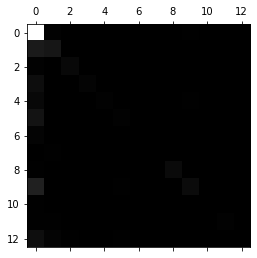

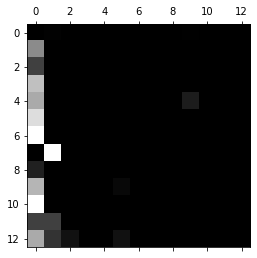

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.689873417721519
Precision Score Train:  0.689873417721519
Recall Score Train:  0.689873417721519
neighbours = 7 err_train = 0.3670886075949367 err_test = 0.4411764705882353
[[175   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 26   7   0   0   0   0   0   0   0   0   0   0   0]
 [  3   3   2   0   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   2   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   2   0   0   0   0   1   0   0   0]
 [ 14   0   0   0   0   1   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   6   0   0   0   0]
 [ 26   0   0   0   0   1   0   0   0   4   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   1   0   0   0   0   0   0   0   0   0   1   0]
 [ 13   2   0   0   0   0   0   0   0   0   0   0   0]]


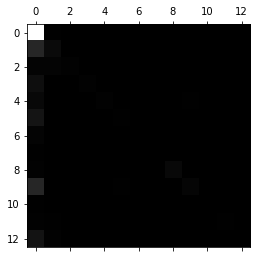

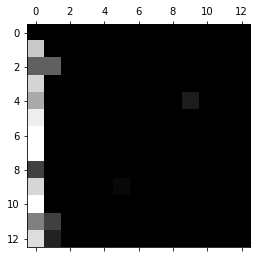

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.6329113924050633
Precision Score Train:  0.6329113924050633
Recall Score Train:  0.6329113924050633
neighbours = 10 err_train = 0.40822784810126583 err_test = 0.4632352941176471
[[175   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 28   5   0   0   0   0   0   0   0   0   0   0   0]
 [  4   2   2   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   1   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   5   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 13   2   0   0   0   0   0   0   0   0   0   0   0]]


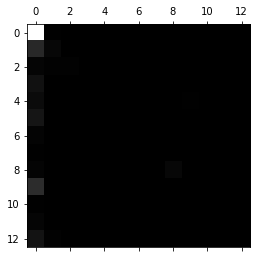

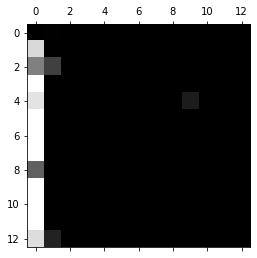

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.5917721518987342
Precision Score Train:  0.5917721518987342
Recall Score Train:  0.5917721518987342
neighbours = 15 err_train = 0.439873417721519 err_test = 0.4632352941176471
[[175   1   0   0   0   0   0   0   0   0   0   0   0]
 [ 32   1   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   1   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   1   0   0   0   0   0   0   1   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]]


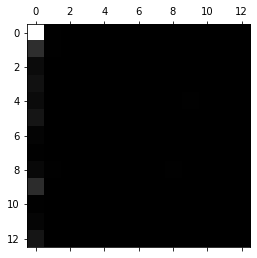

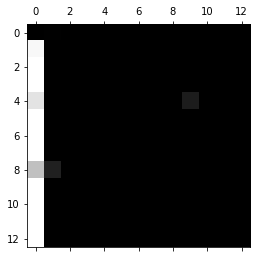

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.560126582278481
Precision Score Train:  0.560126582278481
Recall Score Train:  0.560126582278481
neighbours = 20 err_train = 0.4430379746835443 err_test = 0.47794117647058826
[[176   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]]


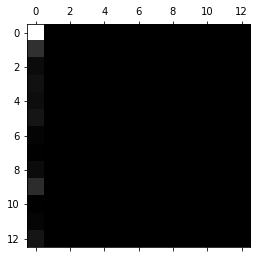

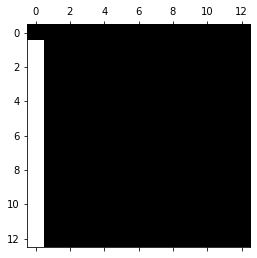

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.5569620253164557
Precision Score Train:  0.5569620253164557
Recall Score Train:  0.5569620253164557
neighbours = 50 err_train = 0.4430379746835443 err_test = 0.49264705882352944
[[176   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]]


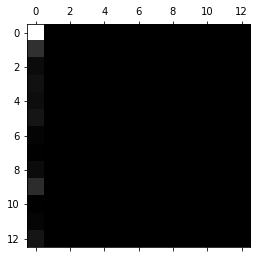

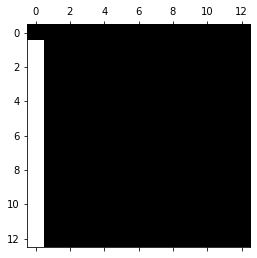

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Mera F1 Train: 0.5569620253164557
Precision Score Train:  0.5569620253164557
Recall Score Train:  0.5569620253164557
neighbours = 100 err_train = 0.4430379746835443 err_test = 0.49264705882352944
[[176   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 33   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 31   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15   0   0   0   0   0   0   0   0   0   0   0   0]]


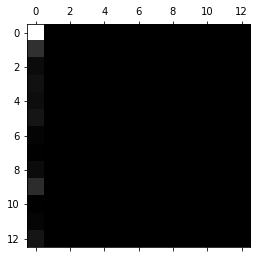

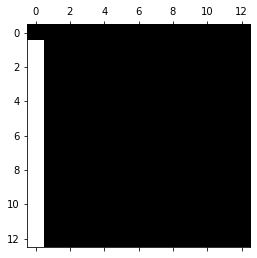

Mera F1 Train: 0.5569620253164557
Precision Score Train:  0.5569620253164557
Recall Score Train:  0.5569620253164557


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import f1_score
neighbors_array = np.array([2,3,5,7,10,15,20,50,100])
for i in range (9):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    y_train_predict = knn.predict(X_train)
    err_train  = np.mean(y_train  != y_train_predict)
    #print(y_test_predict,y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    print(confusion_matrix(y_train,y_train_predict))
    confmx=confusion_matrix(y_train,y_train_predict)
    plt.matshow(confusion_matrix(y_train,y_train_predict),cmap=plt.cm.gray)
    plt.show()
    row_sums = confmx.sum ( axis=1 , keepdims=True )
    norm_conf_mx = confmx / row_sums 
    np.fill_diagonal (norm_conf_mx, 0 )
    plt.matshow ( norm_conf_mx, cmap=plt.cm.gray)
    plt.show ()
    print("Mera F1 Train:",f1_score(y_train,y_train_predict,pos_label='positive',average='micro'))
    print("Precision Score Train: ",precision_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    print("Recall Score Train: ",recall_score(y_train, y_train_predict, pos_label='positive',average='micro'))
    i=i+1

####Линейный SGDClassifier

SGDClassifier - это линейный классификатор, который реализует регуляризованные линейные модели со стохастическим градиентным спуском (SGD). Стохастический градиентный спуск ( SGD ) является решателем.

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Функция cross_val_predict возвращает для каждого элемента на входе предсказание, которое было получено для этого элемента, когда оно находилось в тестовом наборе.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")
y_scores

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning: Number of classes in training fold (12) does not match total number of classes (13). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning: Number of classes in training fold (12) does not match total number of classes (13). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning)


array([[ 3.40236794e+005, -7.87916231e+005, -1.65012000e+006, ...,
        -1.79769313e+308, -6.78622881e+005, -5.95855229e+005],
       [-2.33862374e+005, -1.08356381e+006, -1.64043982e+006, ...,
        -1.79769313e+308, -4.33586270e+005, -2.11288351e+005],
       [-4.90841176e+004, -5.23594014e+005, -1.48911240e+006, ...,
        -1.79769313e+308, -7.90376219e+005, -4.24191130e+005],
       ...,
       [ 7.90269746e+004, -8.88777544e+005,  1.37134401e+005, ...,
        -7.16440768e+005, -6.75717186e+005, -1.42834727e+005],
       [-3.42147739e+004, -7.92811960e+005, -8.09780105e+005, ...,
        -6.91542361e+005, -5.70198020e+005, -1.41524361e+005],
       [-2.95062873e+005, -8.18472230e+005, -8.03713686e+002, ...,
        -7.41510107e+005, -7.80262665e+005,  2.46883795e+005]])

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train,cv=3,method="decision_function")
precisions,recalls,thresholds = precision_recall_curve(y_train,y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="precisions") #tochnost
    plt.plot(thresholds,recalls[:-1],"g-",label="recalls") #polnota
    plt.xlabel("threshold")#porog
    plt.legend(loc="center left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning: Number of classes in training fold (12) does not match total number of classes (13). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:880: RuntimeWarning: Number of classes in training fold (12) does not match total number of classes (13). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  RuntimeWarning)


NameError: ignored

In [ ]:
plt.plot(recalls,precisions,"r-")
plt.xlabel("recalls")
plt.ylabel("precisions")

Реализация roc_curve ограничена задачей двоичной классификации.
Вопрос: можно ли использовать эту функцию для оценки этой задачи?

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2 , label=label )
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve (fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

###Алгоритм Random Forest

In [ ]:
Алгоритм использования ансамбля решающих деревьев Random Forest (далее просто RF).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42 )
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train,cv=3,method="predict_proba")

In [ ]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train,y_scores_forest)
plt.plot(fpr,tpr,"g:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random forest")
plt.legend(loc="lower right")
plt.show()

Вычислим площадь под графиком с помощью функции roc_auc_score:

In [ ]:
roc_auc_score(y_train,y_scores_forest)